In [3]:

from bs4 import BeautifulSoup

html_file = r'C:\Users\dev\Downloads\twoormore.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
w2om_dom = BeautifulSoup(html_str, 'lxml')

In [44]:

a_tags = w2om_dom.find_all('a')
youtube_set = set()
for a_tag in a_tags:
    if 'href' in a_tag.attrs.keys():
        a_href = a_tag['href']
        if '/watch?' in a_href:
            youtube_set.add(a_href)

In [30]:

html_file = r'C:\Users\dev\Downloads\thepeople.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
who_dom = BeautifulSoup(html_str, 'lxml')

In [39]:

import re

space_regex = re.compile('\s+')
idw_name_set = set()
idw_word_set = set()
h2_tags = who_dom.find_all('h2')
for h2_tag in h2_tags:
    a_tags = h2_tag.find_all('a')
    for a_tag in a_tags:
        idw_name = space_regex.sub(' ', a_tag.text.split('|')[0].strip())
        idw_name_set.add(idw_name)
        for idw_word in idw_name.split(' '):
            idw_word_set.add(idw_word)

In [40]:
'Rubin' in idw_word_set

True

In [41]:
'Dave Rubin' in idw_name_set

True

In [59]:

for content_tag in sitePageSoup.find_all(True, {'class': ['style-scope', 'ytd-expander']}):
    print(content_tag.text)
    print()
    for description_tag in content_tag.find_all(id='description'):
        print(description_tag)

In [65]:

r'\b(' + '|'.join(idw_word_set) + r')\b'

'\\b(Claire|Carlin|Eric|Shepherd|Hicks|Ben|Sam|Dreger|Shapiro|Rogan|Dan|Saad|Hoff|Owen|Nicholas|Stephen|Bret|Ayaan|Hirsi|Haidt|Ferriss|Benjamin|the|Pool|Lindsay|Akira|Rebel|Maajid|Wisdom|Jonathan|Harris|James|Peterson|Ali|Heather|Weinstein|Christiansen|Jordan|Camille|Tim|Christina|Gad|Sommers|Douglas|Quillette|Heying|Lehmann|Christakis|Pinker|Dave|Shermer|Damore|Matt|Joe|Paglia|Michael|Carl|Murray|Nawaz|Alice|Steven|Crowder|Don|Rubin)\\b'

In [66]:

for content_tag in sitePageSoup.find_all('title'):
    print(content_tag.text)

Steven Crowder and Dave Rubin Talk Trump, Cruz, Abortion, and Climate Change (Full Interview) - YouTube


In [179]:

def cleanup_text(html_text):
    html_text = re.sub(r'\s+', ' ', html_text)
    html_text = re.sub(' [A-Z]\.? ', ' ', html_text)
    html_text = re.sub('Sargon of Akkad', 'Carl Benjamin', html_text)
    
    return html_text

In [182]:

def get_edge_tuple(channel_div, node_list):
    edge_tuple = set()
    edge_found = False
    for link in channel_div.find('a'):
        if link == 'The Rubin Report':
            edge_tuple = ('Dave Rubin', node_list[0])
            edge_found = True
            break
        elif link == 'StevenCrowder':
            edge_tuple = ('Steven Crowder', node_list[0])
            edge_found = True
            break
        elif link == 'PowerfulJRE':
            edge_tuple = ('Joe Rogan', node_list[0])
            edge_found = True
            break
        elif link == 'Jordan B Peterson':
            edge_tuple = ('Jordan Peterson', node_list[0])
            edge_found = True
            break
        elif link == 'Gad Saad':
            edge_tuple = ('Gad Saad', node_list[0])
            edge_found = True
            break
        elif link == 'Owen Benjamin':
            edge_tuple = ('Owen Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'The Thinkery':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'Matt Christiansen':
            edge_tuple = ('Matt Christiansen', node_list[0])
            edge_found = True
            break
        elif link == 'The Daily Wire':
            edge_tuple = ('Ben Shapiro', node_list[0])
            edge_found = True
            break
        elif link == 'Sargon of Akkad':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
        elif link == 'Sargon of Akkad Livestreams':
            edge_tuple = ('Carl Benjamin', node_list[0])
            edge_found = True
            break
                
    return edge_tuple, edge_found, link

In [183]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline

# Create graph
idw_graph = nx.Graph()
idw_graph.add_nodes_from(idw_name_set)

# Join the who together in a regex
idw_name_regex = re.compile('(' + '|'.join(idw_name_set) + ')')

for site_url in list(youtube_set):
    sitePage = requests.get(url=site_url)
    sitePageSoup = BeautifulSoup(sitePage.content, 'lxml')
    node_list = []
    youtube_title = cleanup_text(sitePageSoup.title.text)
    for match_obj in idw_name_regex.finditer(youtube_title):
        node_list.append(str(match_obj.group()))
    youtube_url_set_dict = nx.get_edge_attributes(idw_graph, 'youtube_url_set')
    
    # <div class="yt-user-info">
    channel_div = sitePageSoup.find('div', class_='yt-user-info')
    
    if len(node_list) < 2:
        description_text = cleanup_text(sitePageSoup.find('p', id='eow-description').text)
        for match_obj in idw_name_regex.finditer(description_text):
            node_list.append(str(match_obj.group()))
    if len(node_list) > 1:
        edge_tuple = (node_list[0], node_list[1])
    elif len(node_list) < 1:
        for link in channel_div.find('a'):
            print('\n{} does not contain any IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
            break
    else:
        edge_tuple, edge_found, link = get_edge_tuple(channel_div, node_list)
        if not edge_found:
            print('\n{} does not contain two IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
    
    if edge_tuple != set():
        youtube_url_set = youtube_url_set_dict.get(edge_tuple, set())
        youtube_url_set.add(site_url)
        idw_graph.add_edge(edge_tuple[0], edge_tuple[1], youtube_url_set=youtube_url_set)


The Thinkery Podcast #18 - Yaron Brook - YouTube does not contain any IDW members. Channel is "The Thinkery". URL is "https://www.youtube.com/watch?v=oH-SUMCz-L0".

Channel 4 Jordan Peterson Interview, my thoughts - YouTube does not contain two IDW members. Channel is "karen straughan". URL is "https://www.youtube.com/watch?v=_UwK-my_Kmw".

The Master and His Emissary: Conversation with Dr. Iain McGilchrist - YouTube does not contain any IDW members. Channel is "Jordan B Peterson". URL is "https://www.youtube.com/watch?v=xtf4FDlpPZ8".

Why Do We Disagree Politically? - YouTube does not contain two IDW members. Channel is "The Agenda with Steve Paikin". URL is "https://www.youtube.com/watch?v=rdiTwxUiIVY".

Objectivist Ethics with Yaron Brook - YouTube does not contain any IDW members. Channel is "Sargon of Akkad Livestreams". URL is "https://www.youtube.com/watch?v=6eIQjGF9jrQ".


In [152]:

idw_graph.nodes(data=False)

NodeView(('Tim Ferriss', 'Ben Shapiro', 'Lindsay Shepherd', 'Michael Shermer', 'Steven Pinker', 'Dan Carlin', 'Dave Rubin', 'Akira the Don', 'James Damore', 'Nicholas Christakis', 'Eric Weinstein', 'Owen Benjamin', 'Steven Crowder', 'Matt Christiansen', 'Carl Benjamin', 'Heather Heying', 'Rebel Wisdom', 'Bret Weinstein', 'Jordan Peterson', 'Tim Pool', 'Douglas Murray', 'Gad Saad', 'Joe Rogan', 'Camille Paglia', 'Quillette', 'Claire Lehmann', 'Sam Harris', 'Alice Dreger', 'Stephen Hicks', 'Christina Hoff Sommers', 'Ayaan Hirsi Ali', 'Maajid Nawaz', 'Jonathan Haidt'))

In [184]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

In [185]:

LAYOUT_DICT = get_layout_dict(idw_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


In [186]:

def draw_graph(G, pos_dict, degree_dict):
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=12)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=2.5)
    
    # Color according to degree
    node_list = G.nodes()
    node_color_list = [degree_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.45,
                                             node_size=2400, node_color=node_color_list, cmap='viridis_r')

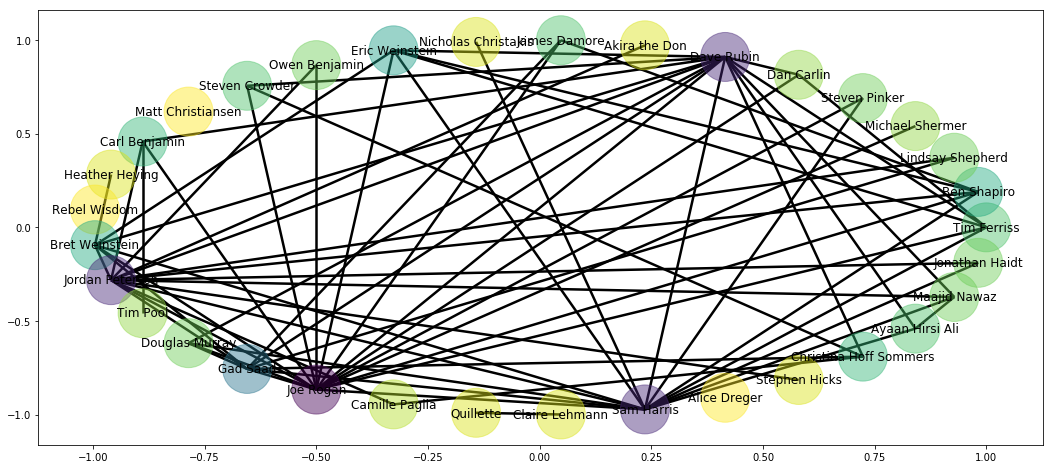

In [187]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['circular_layout']
degree_dict = idw_graph.degree()
draw_graph(idw_graph, pos_dict, degree_dict)

In [162]:

import requests

# Retrieve the page with tag results and set it up to be scraped
site_url = 'https://www.youtube.com/watch?v=VCrQ3EU8_PM'
sitePage = requests.get(url=site_url)
problem_html = sitePage.content
sitePageSoup = BeautifulSoup(problem_html, 'lxml')
with open(r'C:\Users\dev\Downloads\problem.html', 'w') as text_file:
    print(problem_html, file=text_file)

In [163]:

# #eow-description
sitePageSoup.find('p', id='eow-description').text

'On February 17, 2018, James Damore spoke at Portland State on a panel titled, "We Need to Talk About Diversity." He was joined by former Evergreen State biologist Heather E. Heying, PSU philosophy professor Peter Boghossian, and writer Helen Pluckrose. Bret Weinstein also made a cameo appearance. The event was organized by the Freethinkers of PSU, a skeptic student group. Related video: Two days after this panel, some of the panelists spoke at another student event to discuss, "Is intersectionality a religion? Watch: https://www.youtube.com/watch?v=_Avyq...Related articles: https://www.wsj.com/articles/antifa-r...http://quillette.com/2018/02/25/damor...'

In [159]:

'|'.join(idw_name_set)

'Tim Ferriss|Ben Shapiro|Lindsay Shepherd|Michael Shermer|Steven Pinker|Dan Carlin|Dave Rubin|Akira the Don|James Damore|Nicholas Christakis|Eric Weinstein|Owen Benjamin|Steven Crowder|Matt Christiansen|Carl Benjamin|Heather Heying|Rebel Wisdom|Bret Weinstein|Jordan Peterson|Tim Pool|Douglas Murray|Gad Saad|Joe Rogan|Camille Paglia|Quillette|Claire Lehmann|Sam Harris|Alice Dreger|Stephen Hicks|Christina Hoff Sommers|Ayaan Hirsi Ali|Maajid Nawaz|Jonathan Haidt'

In [151]:

idw_graph.edges(data=True)

EdgeDataView([('Tim Ferriss', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=QP2-8Zox4W8'}}), ('Tim Ferriss', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=8LPwyy4scAc'}}), ('Tim Ferriss', 'Dan Carlin', {'youtube_url_set': {'https://www.youtube.com/watch?v=gWVH8xkdhaY'}}), ('Tim Ferriss', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=IRyO_nd4aFY'}}), ('Tim Ferriss', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=W7LvxGfP7II'}}), ('Ben Shapiro', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=HOxmIjiRqTw'}}), ('Ben Shapiro', 'James Damore', {'youtube_url_set': {'https://www.youtube.com/watch?v=RPGXkPVw93A'}}), ('Ben Shapiro', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=FmH7JUeVQb8'}}), ('Ben Shapiro', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=iRPDGEgaATU'}}), ('Ben Shapiro', 'Joe Rogan', {'youtube_url_set': {'https://www.

In [219]:

import sys
import inspect

def get_module_version(python_module):
    for attr in dir(python_module):
        if 'version' in attr.lower():
            if hasattr(getattr(python_module, attr), '__call__'):
                try:
                    print('{}(): {}'.format(attr, getattr(python_module, attr)()))
                except Exception as e:
                    try:
                        print('{}({}): {}'.format(attr, inspect.getfullargspec(python_module),
                                                  getattr(python_module, attr)))
                    except Exception as e:
                        print('{}(): {} ({})'.format(attr, getattr(python_module, attr), e))
            else:
                print('{}: {}'.format(attr, getattr(python_module, attr, '????')))
get_module_version(sys)

api_version: 1013
getwindowsversion(): sys.getwindowsversion(major=10, minor=0, build=17134, platform=2, service_pack='')
hexversion: 50726128
version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
version_info: sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [216]:

%who

BeautifulSoup	 LAYOUT_DICT	 a_href	 a_tag	 a_tags	 channel_div	 cleanup_text	 collections	 content_tag	 
degree_dict	 description_text	 draw_graph	 edge_found	 edge_tuple	 func	 get_edge_tuple	 get_layout_dict	 get_module_version	 
h2_a_tags	 h2_tag	 h2_tags	 html_file	 html_str	 idw_graph	 idw_name	 idw_name_regex	 idw_name_set	 
idw_word	 idw_word_set	 inspect	 link	 match_obj	 myfile	 node_list	 nx	 p_tag	 
p_tags	 plt	 pos_dict	 problem_html	 re	 requests	 sitePage	 sitePageSoup	 site_url	 
space_regex	 sys	 text_file	 w2om_dom	 who_dom	 youtube_set	 youtube_title	 youtube_url_list	 youtube_url_list_dict	 
youtube_url_set	 youtube_url_set_dict	 


In [217]:

get_module_version(re)

__version__: 2.2.1
